In [1]:
from trainAndPredict import *
from kNN import kNN
import dataHandler
import time

trainAndPredict contains the following models:

    1) linearReg (single layer)
    2) twoLayers (hidden units: 300, relu)
    3) threeLayers (hidden units: 300, relu)
    4) nLayers (hidden units: 2000,1500,1000,500,100,40 all with relu activation)

In the next cell we run a training session on nLayers.

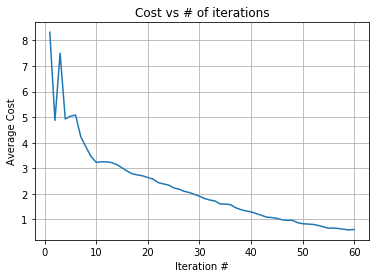

In [2]:
nn = training(nLayers, iterations=60, batchSize=5000, plot=True)

We ran a training session in the past and saved it.

Below, we load it run it and save it again.

In [3]:
filePath = 'NN-2000-1500-1000-500-100-40-HU'
nn2 = dataHandler.loadDataFromFile(filePath)

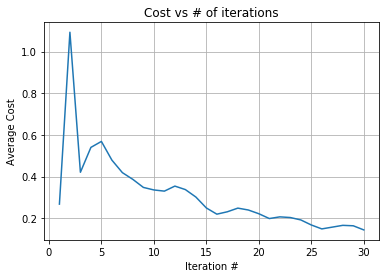

In [4]:
nn2 = training(nn2, iterations=30, batchSize=12000, plot=True)

In [5]:
# we can save the progress by uncommenting the following line
# dataHandler.saveDataToFile(nn2, filePath)

###### k-Nearest Neighbor

In [6]:
knn = kNN(trainX.T, trainLabels)
knn.predict(testX.T[0], 5), testLabels[0]

(7, 7)

In [7]:
predictions = knn.predictMany(testX.T[:10], k=5)
print(predictions, predictions == testLabels[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9] [ True  True  True  True  True  True  True  True  True  True]


In [8]:
kValues = range(1,21)
bestK, accuracies = knn.optimizeK(testX.T, testLabels, kValues)
print("Accuracies:")
for i, acc in enumerate(accuracies):
    print("k={:2d} achieved {:5.2f}% success rate.".format(kValues[i],100*acc))
print("The best value of k is {}".format(bestK))

Accuracies:
k= 1 achieved 96.91% success rate.
k= 2 achieved 96.64% success rate.
k= 3 achieved 97.14% success rate.
k= 4 achieved 96.98% success rate.
k= 5 achieved 96.91% success rate.
k= 6 achieved 96.93% success rate.
k= 7 achieved 96.92% success rate.
k= 8 achieved 96.85% success rate.
k= 9 achieved 96.66% success rate.
k=10 achieved 96.73% success rate.
k=11 achieved 96.69% success rate.
k=12 achieved 96.60% success rate.
k=13 achieved 96.56% success rate.
k=14 achieved 96.42% success rate.
k=15 achieved 96.35% success rate.
k=16 achieved 96.35% success rate.
k=17 achieved 96.33% success rate.
k=18 achieved 96.35% success rate.
k=19 achieved 96.30% success rate.
k=20 achieved 96.22% success rate.
The best value of k is 3


In [10]:
kValues = range(1,21)
bestK, accuracies = knn.optimizeK(testX.T, testLabels, kValues, withWeight=True)
print("Accuracies:")
for i, acc in enumerate(accuracies):
    print("k={:2d} achieved {:5.2f}% success rate.".format(kValues[i],100*acc))
print("The best value of k (with weights enabled) is {}".format(bestK))

Accuracies:
k= 1 achieved 96.91% success rate.
k= 2 achieved 96.91% success rate.
k= 3 achieved 97.06% success rate.
k= 4 achieved 97.24% success rate.
k= 5 achieved 97.16% success rate.
k= 6 achieved 97.18% success rate.
k= 7 achieved 97.16% success rate.
k= 8 achieved 97.19% success rate.
k= 9 achieved 97.09% success rate.
k=10 achieved 96.96% success rate.
k=11 achieved 96.98% success rate.
k=12 achieved 96.94% success rate.
k=13 achieved 96.89% success rate.
k=14 achieved 96.82% success rate.
k=15 achieved 96.81% success rate.
k=16 achieved 96.71% success rate.
k=17 achieved 96.68% success rate.
k=18 achieved 96.63% success rate.
k=19 achieved 96.64% success rate.
k=20 achieved 96.61% success rate.
The best value of k (with weights enabled) is 4


###### k-NN with Dimensionality Reduction

In [32]:
meanX = np.mean(trainX, axis=1, keepdims=True)
trainX_0 = (trainX-meanX)
testX_0 = (testX-meanX)

G = np.dot(trainX_0,trainX_0.T)

L, V = np.linalg.eigh(G)
L = np.flip(L)
V = np.flip(V, axis=1)

def reduceDim(X, dim=30):
    return np.dot(V[:,:dim].T,X)

trainX_red = reduceDim(trainX_0)
testX_red = reduceDim(testX_0)
trainX_red.shape, testX_red.shape

((30, 60000), (30, 10000))

In [33]:
knn = kNN(trainX_red.T, trainLabels)

tic = time.time()
kValues = range(1,21)
bestK, accuracies = knn.optimizeK(testX_red.T, testLabels, kValues)
print("Accuracies:")
for i, acc in enumerate(accuracies):
    print("k={:2d} achieved {:5.2f}% success rate.".format(kValues[i],100*acc))
print("The best value of k is {}".format(bestK))
toc = time.time()
print("Computed in {}s".format(toc-tic))


Accuracies:
k= 1 achieved 97.18% success rate.
k= 2 achieved 96.83% success rate.
k= 3 achieved 97.55% success rate.
k= 4 achieved 97.35% success rate.
k= 5 achieved 97.58% success rate.
k= 6 achieved 97.44% success rate.
k= 7 achieved 97.51% success rate.
k= 8 achieved 97.37% success rate.
k= 9 achieved 97.47% success rate.
k=10 achieved 97.26% success rate.
k=11 achieved 97.39% success rate.
k=12 achieved 97.24% success rate.
k=13 achieved 97.21% success rate.
k=14 achieved 97.19% success rate.
k=15 achieved 97.20% success rate.
k=16 achieved 97.22% success rate.
k=17 achieved 97.21% success rate.
k=18 achieved 97.19% success rate.
k=19 achieved 97.15% success rate.
k=20 achieved 97.13% success rate.
The best value of k is 5
Computed in 869.2294645309448s


In [36]:
knn = kNN(trainX_red.T, trainLabels)

tic = time.time()
kValues = range(1,21)
bestK, accuracies = knn.optimizeK(testX_red.T, testLabels, kValues, withWeight=True)
print("Accuracies:")
for i, acc in enumerate(accuracies):
    print("k={:2d} achieved {:5.2f}% success rate.".format(kValues[i],100*acc))
print("The best value of k is {}".format(bestK))
toc = time.time()
print("Computed in {}s".format(toc-tic))


Accuracies:
k= 1 achieved 97.18% success rate.
k= 2 achieved 97.18% success rate.
k= 3 achieved 97.30% success rate.
k= 4 achieved 97.55% success rate.
k= 5 achieved 97.65% success rate.
k= 6 achieved 97.64% success rate.
k= 7 achieved 97.56% success rate.
k= 8 achieved 97.55% success rate.
k= 9 achieved 97.56% success rate.
k=10 achieved 97.55% success rate.
k=11 achieved 97.54% success rate.
k=12 achieved 97.54% success rate.
k=13 achieved 97.58% success rate.
k=14 achieved 97.54% success rate.
k=15 achieved 97.52% success rate.
k=16 achieved 97.52% success rate.
k=17 achieved 97.50% success rate.
k=18 achieved 97.50% success rate.
k=19 achieved 97.38% success rate.
k=20 achieved 97.37% success rate.
The best value of k is 5
Computed in 867.1554896831512s
